In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pip-install-lifelines/fonttools-4.55.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pip-install-lifelines/tzdata-2024.2-py2.py3-none-any.whl
/kaggle/input/pip-install-lifelines/kiwisolver-1.4.7-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
/kaggle/input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
/kaggle/input/pip-install-lifelines/scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pip-install-lifelines/pillow-11.0.0-cp310-cp310-manylinux_2_28_x86_64.whl
/kaggle/input/pip-install-lifelines/contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pip-install-lifelines/pyparsing-3.2.0-py3-none-any.whl
/kaggle/input/pip-install-lifelines/wrapt-1.17.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pip-install-lifelines/__results__.html
/kaggle/input/pip-install-lifelines/cycler-0.12.1-py3-n

In [2]:
!pip install /kaggle/input/lightautoml-pip/json2html-1.3.0-py3-none-any.whl
!pip install /kaggle/input/lightautoml-pip/autowoe-1.3.3-py3-none-any.whl
!pip install /kaggle/input/lightautoml-pip/poetry_core-1.9.1-py3-none-any.whl
!pip install /kaggle/input/lightautoml-pip/statsmodels-0.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
!pip install /kaggle/input/lightautoml-pip/cmaes-0.11.1-py3-none-any.whl
!pip install /kaggle/input/lightautoml-pip/lightautoml-0.4.0-py3-none-any.whl
!pip install /kaggle/input/pip-install-lifelines/autograd-1.7.0-py3-none-any.whl
!pip install /kaggle/input/pip-install-lifelines/autograd-gamma-0.5.0.tar.gz
!pip install /kaggle/input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
!pip install /kaggle/input/pip-install-lifelines/formulaic-1.0.2-py3-none-any.whl
!pip install /kaggle/input/pip-install-lifelines/lifelines-0.30.0-py3-none-any.whl

Processing /kaggle/input/lightautoml-pip/json2html-1.3.0-py3-none-any.whl
Processing /kaggle/input/lightautoml-pip/autowoe-1.3.3-py3-none-any.whl
Processing /kaggle/input/lightautoml-pip/poetry_core-1.9.1-py3-none-any.whl
Processing /kaggle/input/lightautoml-pip/statsmodels-0.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:
      Successfully uninstalled statsmodels-0.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.4 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.
Processing /kaggle/input/lightautoml-pip/cmaes-0.11.1-py3-none-any.whl
Processing /kaggle/input/lightautoml-pip/lightautoml-0.4.0-py3-none-any.whl
Processing /kaggle/input/pip-install-lifelines/autograd-1.7.0-py3

In [3]:
try:
    import numpy as np
    import pandas as pd
    import re
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler,OneHotEncoder 
    from sklearn.base import clone
    from lifelines import KaplanMeierFitter, BreslowFlemingHarringtonFitter, NelsonAalenFitter
    from lightautoml.automl.presets.tabular_presets import TabularAutoML
    from lightautoml.tasks import Task
    import xgboost as xgb
    from lifelines.utils import concordance_index


    print("All libraries were imported successfully.")

except ImportError as e:
    print(f"Error importing libraries: {e}")


All libraries were imported successfully.


In [4]:
test = pd.read_csv("/kaggle/input/equity-post-HCT-survival-predictions/test.csv")
print("Test shape:", test.shape)

train = pd.read_csv("/kaggle/input/equity-post-HCT-survival-predictions/train.csv")
print("Train shape:", train.shape)

Test shape: (3, 58)
Train shape: (28800, 60)


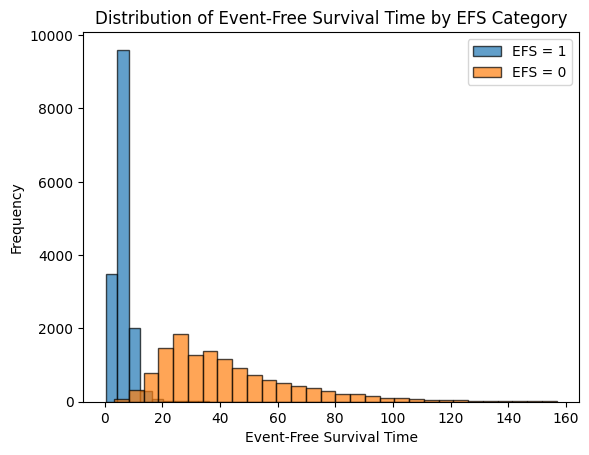

In [5]:
import matplotlib.pyplot as plt

# Separate the data based on 'efs' values (assuming 'efs' is binary, e.g., 0 and 1)
efs_0_times = train[train['efs'] == 0]['efs_time']
efs_1_times = train[train['efs'] == 1]['efs_time']

# Create histograms for each 'efs' category
plt.hist(efs_1_times.dropna(), bins=30, alpha=0.7, label='EFS = 1',  edgecolor='black')
plt.hist(efs_0_times.dropna(), bins=30, alpha=0.7, label='EFS = 0',  edgecolor='black')

# Add title and labels
plt.title('Distribution of Event-Free Survival Time by EFS Category')
plt.xlabel('Event-Free Survival Time')
plt.ylabel('Frequency')

# Show legend
plt.legend()

# Display the plot
plt.show()


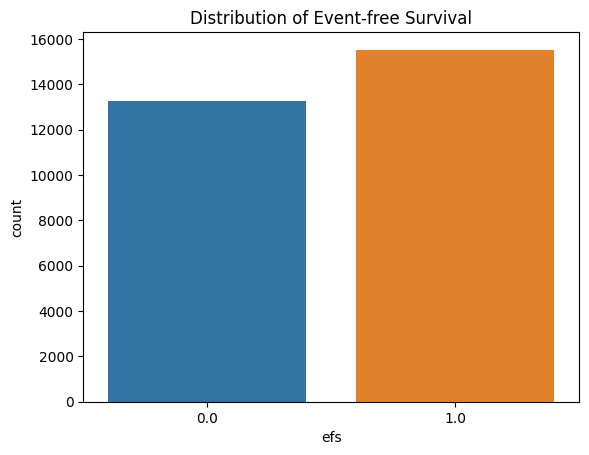

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='efs', data=train)
plt.title('Distribution of Event-free Survival')
plt.show()


In [7]:
def score(solution: pd.DataFrame, submission: pd.DataFrame, row_id_column_name: str) -> float:
    # Remove ID columns
    del solution[row_id_column_name]
    del submission[row_id_column_name]

    event_label = 'efs'
    interval_label = 'efs_time'
    prediction_label = 'prediction'

    # Ensure submission columns are numeric
    for col in submission.columns:
        if not pd.api.types.is_numeric_dtype(submission[col]):
            raise Exception(f'Submission column {col} must be a number')

    # Merge true and predicted values
    merged_df = pd.concat([solution, submission], axis=1)
    merged_df.reset_index(inplace=True)

    # Group by race_group and compute concordance index per group
    merged_df_race_dict = dict(merged_df.groupby(['race_group']).groups)
    c_index_list = []
    
    # Calculate the C-index for each race group
    for race in merged_df_race_dict.keys():
        indices = sorted(merged_df_race_dict[race])
        merged_df_race = merged_df.iloc[indices]
        
        # Calculate C-index for this race group
        c_index_race = concordance_index(
            merged_df_race[interval_label],
            -merged_df_race[prediction_label],
            merged_df_race[event_label]
        )
        
        # Store the C-index for this race group
        c_index_list.append(c_index_race)
    
    # Calculate the mean and standard deviation of the C-index scores across all race groups
    mean_c_index = np.mean(c_index_list)
    std_c_index = np.std(c_index_list)
    
    # Return the stratified C-index score: mean - std
    return float(mean_c_index - std_c_index)


In [8]:
# Define target and feature columns
id_et_tgt = ["ID", "efs", "efs_time", "y_km", "y_bf", "y_na", "y_co"]
features = [c for c in train.columns if c not in id_et_tgt]

# Separate categorical and numerical features
cat_cols = train.select_dtypes('object').columns.tolist()
num_cols = train.select_dtypes(include=['number']).columns.tolist()
num_cols = [c for c in num_cols if c not in id_et_tgt]

# Save race_group column separately for evaluation
train_race = train[['ID', 'race_group', 'efs', 'efs_time']]
test_race = test[['ID', 'race_group']]

In [9]:
# Function to generate safe and unique feature names
def _make_safe_and_unique(feature_names):
    used = {}
    safe_unique_names = []

    for fname in feature_names:
        base = re.sub(r'[^0-9a-zA-Z_]+', '_', fname)
        base = re.sub(r'_+', '_', base).strip('_')

        unique_name = base
        counter = 1
        while unique_name in used:
            counter += 1
            unique_name = f"{base}__{counter}"

        used[unique_name] = True
        safe_unique_names.append(unique_name)

    return safe_unique_names

# Function to encode categorical features
def cat_encode(data, cat_cols, encoder=None):
    df_cat = data[cat_cols]
    df_other = data.drop(columns=cat_cols)

    if encoder is None:
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_array = encoder.fit_transform(df_cat)
    else:
        encoded_array = encoder.transform(df_cat)

    raw_feature_names = encoder.get_feature_names_out(cat_cols)
    cleaned_feature_names = _make_safe_and_unique(raw_feature_names)

    encoded_df = pd.DataFrame(encoded_array, columns=cleaned_feature_names, index=data.index)
    new_data = pd.concat([df_other, encoded_df], axis=1)

    return new_data, encoder

# Function to normalize numerical features
def scale_numeric_features(data, num_cols, scaler=None):
    df_num = data[num_cols]
    df_other = data.drop(columns=num_cols)

    if scaler is None:
        scaler = StandardScaler()
        scaled_array = scaler.fit_transform(df_num)
    else:
        scaled_array = scaler.transform(df_num)

    scaled_df = pd.DataFrame(scaled_array, columns=num_cols, index=data.index)
    new_data = pd.concat([df_other, scaled_df], axis=1)

    return new_data, scaler


In [10]:
# Apply transformations
origin_cols = list(train.columns)

# Encode categorical features
train, encoder = cat_encode(train, cat_cols)
test, _ = cat_encode(test, cat_cols, encoder=encoder)

# Scale numerical features
train, scaler = scale_numeric_features(train, num_cols)
test, _ = scale_numeric_features(test, num_cols, scaler=scaler)

# Update feature list
new_features = [c for c in features if c not in cat_cols]
diff_cols = list(train.columns.difference(origin_cols))
new_features += diff_cols

In [11]:
for i in new_features:
    print(i, end = " ")
    print(", " ,end = "")

hla_match_c_high , hla_high_res_8 , hla_low_res_6 , hla_high_res_6 , hla_high_res_10 , hla_match_dqb1_high , hla_nmdp_6 , hla_match_c_low , hla_match_drb1_low , hla_match_dqb1_low , year_hct , hla_match_a_high , donor_age , hla_match_b_low , age_at_hct , hla_match_a_low , hla_match_b_high , comorbidity_score , karnofsky_score , hla_low_res_8 , hla_match_drb1_high , hla_low_res_10 , arrhythmia_No , arrhythmia_Not_done , arrhythmia_Yes , arrhythmia_nan , cardiac_No , cardiac_Not_done , cardiac_Yes , cardiac_nan , cmv_status__2 , cmv_status__3 , cmv_status__4 , cmv_status_nan , conditioning_intensity_MAC , conditioning_intensity_NMA , conditioning_intensity_N_A_F_pre_TED_not_submitted , conditioning_intensity_No_drugs_reported , conditioning_intensity_RIC , conditioning_intensity_TBD , conditioning_intensity_nan , cyto_score_Favorable , cyto_score_Intermediate , cyto_score_Normal , cyto_score_Not_tested , cyto_score_Other , cyto_score_Poor , cyto_score_TBD , cyto_score_detail_Favorable , 

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def num_encode(data, num_cols, encoder=None):
    """
    Perform missing value imputation and normalization on numerical columns.
    
    Args:
        data: pd.DataFrame - Input dataset.
        num_cols: list - List of numerical column names.
        encoder: tuple - Pre-trained (imputer, scaler) (default: None).
    
    Returns:
        new_data: pd.DataFrame - Transformed dataset.
        encoder: tuple - Trained (imputer, scaler).
    """
    df_num = data[num_cols].copy()  # Copy to avoid modifying original data
    
    if encoder is None:
        imputer = SimpleImputer(strategy='mean')  
        scaler = StandardScaler()
        
        df_num[:] = imputer.fit_transform(df_num)
        df_num[:] = scaler.fit_transform(df_num)

        encoder = (imputer, scaler)
    else:
        imputer, scaler = encoder
        
        df_num[:] = imputer.transform(df_num)
        df_num[:] = scaler.transform(df_num)

    # Concatenate transformed numerical data with the rest of the dataset
    df_other = data.drop(columns=num_cols)
    new_data = pd.concat([df_other, df_num], axis=1)

    return new_data, encoder

# Apply transformations
train, encoder = num_encode(train, num_cols)
test, _ = num_encode(test, num_cols, encoder=encoder)


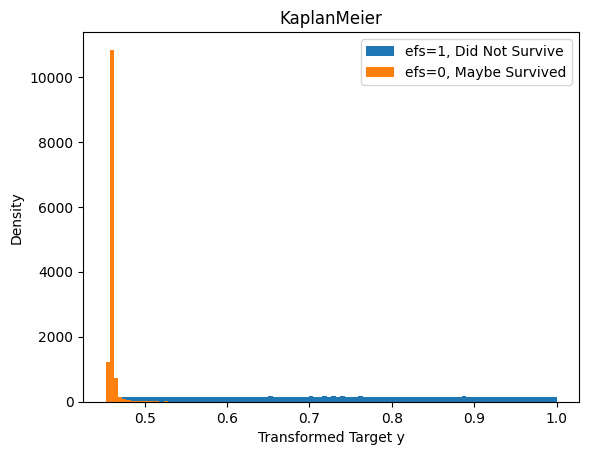

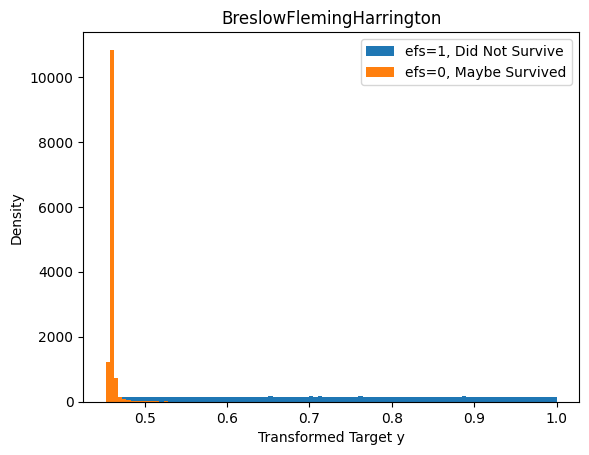

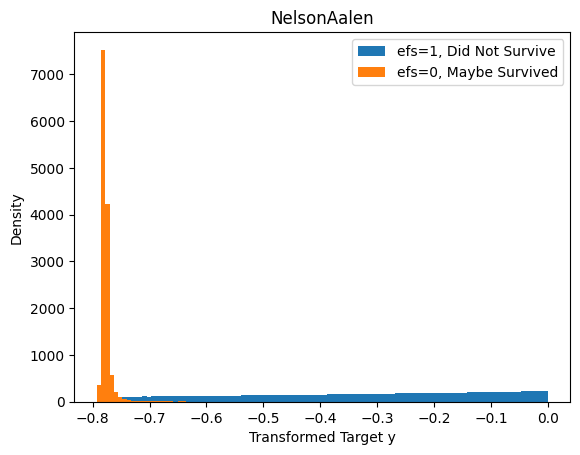

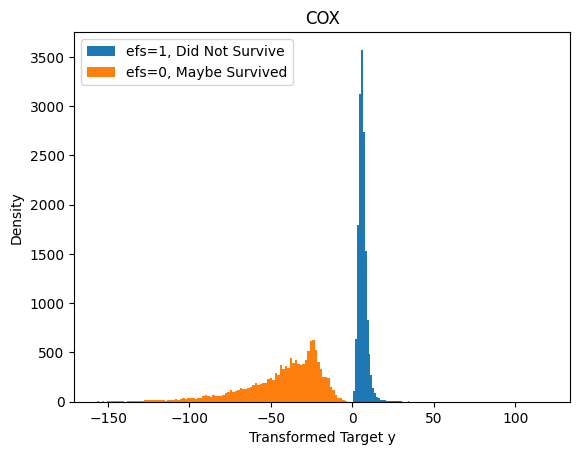

In [13]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(train['efs_time'], train['efs'])
train['y_km'] = kmf.survival_function_at_times(train['efs_time']).values

from lifelines import BreslowFlemingHarringtonFitter

bff = BreslowFlemingHarringtonFitter()
bff.fit(train['efs_time'], train['efs'])
train['y_bf'] = bff.survival_function_at_times(train['efs_time']).values

from lifelines import NelsonAalenFitter

naf = NelsonAalenFitter()
naf.fit(durations=train['efs_time'], event_observed=train['efs'])
train['y_na'] = naf.cumulative_hazard_at_times(train['efs_time']).values
train['y_na'] = train['y_na'] * -1

train["y_co"] = train.efs_time.copy()
train.loc[train.efs==0, "y_co"] *= -1


plt.hist(train.loc[train.efs == 1, "y_km"], bins=100, label="efs=1, Did Not Survive")
plt.hist(train.loc[train.efs == 0, "y_km"], bins=100, label="efs=0, Maybe Survived")
plt.xlabel("Transformed Target y")
plt.ylabel("Density")
plt.title("KaplanMeier")
plt.legend()
plt.show()

plt.hist(train.loc[train.efs == 1, "y_bf"], bins=100, label="efs=1, Did Not Survive")
plt.hist(train.loc[train.efs == 0, "y_bf"], bins=100, label="efs=0, Maybe Survived")
plt.xlabel("Transformed Target y")
plt.ylabel("Density")
plt.title("BreslowFlemingHarrington")
plt.legend()
plt.show()

plt.hist(train.loc[train.efs == 1, "y_na"], bins=100, label="efs=1, Did Not Survive")
plt.hist(train.loc[train.efs == 0, "y_na"], bins=100, label="efs=0, Maybe Survived")
plt.xlabel("Transformed Target y")
plt.ylabel("Density")
plt.title("NelsonAalen")
plt.legend()
plt.show()

plt.hist(train.loc[train.efs == 1, "y_co"], bins=100, label="efs=1, Did Not Survive")
plt.hist(train.loc[train.efs == 0, "y_co"], bins=100, label="efs=0, Maybe Survived")
plt.xlabel("Transformed Target y")
plt.ylabel("Density")
plt.title("COX")
plt.legend()
plt.show()

In [14]:
target_label = "y_na"

cols_to_drop = [col for col in id_et_tgt if col != target_label]
cols_to_drop

['ID', 'efs', 'efs_time', 'y_km', 'y_bf', 'y_co']

In [15]:
# Prepare train data
train_feat_et_tgt = train.drop(columns=cols_to_drop)

# Split train/validation sets
train_split, valid_split, train_race_split, valid_race_split = train_test_split(
    train_feat_et_tgt, train_race, test_size=0.01, random_state=42
)

In [16]:
# --- LightAutoML Training (DNN) ---
task = Task('reg')
automl = TabularAutoML(
    gpu_ids='0,1',
    task=task,
    reader_params={'cv': 5, 'random_state': 42},
    general_params={'allowed_algos': ['nn']}
)



In [17]:
oof_pred = automl.fit_predict(train_split, roles={'target': target_label})


In [18]:
%%time
valid_pred_laml = automl.predict(valid_split).data.flatten()

CPU times: user 1.04 s, sys: 7.77 ms, total: 1.04 s
Wall time: 534 ms


In [19]:
# Prepare final submission DataFrame using only LightAutoML predictions
valid_pred_df = pd.DataFrame({'ID': valid_race_split['ID'].values, 'prediction': valid_pred_laml})

# Evaluate using Concordance Index
valid_race_split = valid_race_split.reset_index(drop=True)
valid_score = score(
    valid_race_split[['ID', 'efs', 'efs_time', 'race_group']].copy(),
    valid_pred_df.copy(),
    row_id_column_name='ID'
)

print("Validation Concordance Index Score:", valid_score)


Validation Concordance Index Score: 0.5786118239771761


In [20]:
test_feats = test.drop(columns=['ID'])
sub_pred = automl.predict(test_feats).data


In [21]:
sub = pd.read_csv("/kaggle/input/equity-post-HCT-survival-predictions/sample_submission.csv")
sub.prediction = sub_pred
sub.to_csv("submission.csv", index=False)
print("Sub shape:", sub.shape)
sub.head()

Sub shape: (3, 2)


,ID,prediction
0,28800,-0.714541
1,28801,-0.428179
2,28802,-0.790939
